# Загрузка и предобработка данных

In [46]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st

In [2]:
kickstarter = pd.read_csv('kickstarter.csv') 

In [3]:
 kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
Unnamed: 0          378661 non-null int64
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            359728 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378472 non-null float64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
Unnamed             378661 non-null int64
dtypes: float64(6), int64(3), object(8)
memory usage: 49.1+ MB


In [4]:
kickstarter.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Unnamed
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0.0,1533.95,1000002330
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,US,100.0,2421.0,30000.00,1000003930
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,NaN,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,220.0,45000.00,1000004038
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,1.0,5000.00,1000007540
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,1283.0,19500.00,1000011046


- `Country` - страна проекта
- `Currency` - валюта проекта
- `ID` - идентификатор проекта
- `Launched` - дата и время регистрации проекта
- `Main Category` - основная категория проекта
- `State` - статус проекта
- `Backers` - количество спонсоров проекта
- `Goal` - сколько нужно собрать проекту, финансовая цель
- `Pledged` - собрано, в лоцальной валюте
- `Usd Pledged` - собрано в доллара США

In [5]:
 kickstarter = kickstarter.drop(columns=['ID','Unnamed: 0','Unnamed','usd_pledged_real','usd_goal_real'])

In [6]:
 kickstarter.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged'],
      dtype='object')

In [13]:
kickstarter.isna().sum()

index                0
name                 0
category             0
main_category        0
currency         18762
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged          0
year                 0
month                0
dayofweek            0
day                  0
hour                 0
duration             0
dtype: int64

In [8]:
kickstarter.dropna(subset=['name'],inplace=True)
kickstarter.dropna(subset=['backers'],inplace=True)
kickstarter.dropna(subset=['usd pledged'],inplace=True)

In [9]:
kickstarter['launched'] = pd.to_datetime(kickstarter['launched'])
kickstarter['deadline'] = pd.to_datetime(kickstarter['deadline'])

In [10]:
kickstarter['year'] = kickstarter['launched'].dt.year
kickstarter['month'] = kickstarter['launched'].dt.month
kickstarter['dayofweek'] = kickstarter['launched'].dt.dayofweek
kickstarter['day'] = kickstarter['launched'].dt.day
kickstarter['hour'] = kickstarter['launched'].dt.hour

In [11]:
kickstarter['duration'] = (kickstarter['deadline']-kickstarter['launched']).dt.days

In [12]:
kickstarter.reset_index(inplace=True)

In [14]:
dct = dict(zip(kickstarter['country'],kickstarter['currency']))

In [15]:
dct

{'GB': 'GBP',
 'US': 'USD',
 'CA': 'CAD',
 'AU': 'AUD',
 'NO': 'NOK',
 'IT': 'EUR',
 'DE': 'EUR',
 'IE': 'EUR',
 'MX': 'MXN',
 'ES': 'EUR',
 'SE': 'SEK',
 'FR': 'EUR',
 'NL': 'EUR',
 'NZ': 'NZD',
 'CH': 'CHF',
 'AT': 'EUR',
 'DK': 'DKK',
 'BE': 'EUR',
 'HK': 'HKD',
 'LU': 'EUR',
 'SG': 'SGD',
 'JP': 'JPY'}

In [16]:
list_of_index = kickstarter[kickstarter['currency'].isna()].index

In [17]:
kickstarter.iloc[list_of_index]

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year,month,dayofweek,day,hour,duration
2,2,Where is Hank?,Narrative Film,Film & Video,NaN,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,US,220.00,2013,1,5,12,0,44
18,18,Mike Corey's Darkness & Light Album,Music,Music,NaN,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7.0,US,250.00,2012,8,3,2,14,14
40,40,Unschooling To University Book Project,Nonfiction,Publishing,NaN,2018-01-19,3000.0,2017-11-20 18:15:14,592.00,live,24.0,CA,185.65,2017,11,0,20,18,59
53,53,A Teacher's Travels in China,Photography,Photography,NaN,2012-05-13,4000.0,2012-04-18 23:34:56,4866.17,successful,71.0,US,4866.17,2012,4,2,18,23,24
69,69,"""Flying"" Carpets from Azerbaijan, Iran and Tur...",Weaving,Crafts,NaN,2015-04-29,5000.0,2015-03-30 19:55:31,2.00,failed,1.0,GB,2.98,2015,3,0,30,19,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374572,378558,"A new venture, needs a new wheel.",Printing,Crafts,NaN,2017-08-13,2000.0,2017-07-13 07:49:29,2916.00,successful,60.0,GB,2237.56,2017,7,3,13,7,30
374635,378623,BETTER DESPERATE,Music Videos,Film & Video,NaN,2016-05-07,300.0,2016-04-07 20:04:26,300.00,successful,5.0,US,300.00,2016,4,3,7,20,29
374643,378631,MONSTROCARDS- A Creative Drawing Game of Horri...,Playing Cards,Games,NaN,2014-10-03,10000.0,2014-09-03 19:53:50,13861.50,successful,413.0,US,13861.50,2014,9,2,3,19,29
374659,378647,The Cease is Increase,Nonfiction,Publishing,NaN,2012-09-14,4999.0,2012-08-15 17:11:00,980.00,failed,16.0,US,980.00,2012,8,2,15,17,29


In [18]:
kickstarter['currency'] = kickstarter.apply(lambda x: dct[x['country']] if pd.isna(x['currency']) else x['currency'],axis=1 )

In [19]:
kickstarter.iloc[list_of_index]

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year,month,dayofweek,day,hour,duration
2,2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,US,220.00,2013,1,5,12,0,44
18,18,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7.0,US,250.00,2012,8,3,2,14,14
40,40,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.00,live,24.0,CA,185.65,2017,11,0,20,18,59
53,53,A Teacher's Travels in China,Photography,Photography,USD,2012-05-13,4000.0,2012-04-18 23:34:56,4866.17,successful,71.0,US,4866.17,2012,4,2,18,23,24
69,69,"""Flying"" Carpets from Azerbaijan, Iran and Tur...",Weaving,Crafts,GBP,2015-04-29,5000.0,2015-03-30 19:55:31,2.00,failed,1.0,GB,2.98,2015,3,0,30,19,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374572,378558,"A new venture, needs a new wheel.",Printing,Crafts,GBP,2017-08-13,2000.0,2017-07-13 07:49:29,2916.00,successful,60.0,GB,2237.56,2017,7,3,13,7,30
374635,378623,BETTER DESPERATE,Music Videos,Film & Video,USD,2016-05-07,300.0,2016-04-07 20:04:26,300.00,successful,5.0,US,300.00,2016,4,3,7,20,29
374643,378631,MONSTROCARDS- A Creative Drawing Game of Horri...,Playing Cards,Games,USD,2014-10-03,10000.0,2014-09-03 19:53:50,13861.50,successful,413.0,US,13861.50,2014,9,2,3,19,29
374659,378647,The Cease is Increase,Nonfiction,Publishing,USD,2012-09-14,4999.0,2012-08-15 17:11:00,980.00,failed,16.0,US,980.00,2012,8,2,15,17,29


In [20]:
kickstarter.isna().sum()

index            0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
year             0
month            0
dayofweek        0
day              0
hour             0
duration         0
dtype: int64

# Описательные статистики

count    2.093260e+05
mean     6.933186e+03
std      7.603268e+04
min      0.000000e+00
25%      1.700000e+01
50%      3.940000e+02
75%      3.035000e+03
max      2.033899e+07
Name: usd pledged, dtype: float64

## Среднее

<img src='https://img.my-excel.ru/formula-v-jeksel-srednee-arifmeticheskoe_5_1.png'>

6933.186360175007

## Медиана

<img src='https://m-learn.ru/wp-content/uploads/2018/06/fig_3-1024x511.png'>

394.0

## Мода

<img src='https://statanaliz.info/wp-content/uploads/2015/01/moda_04.png'>

0    0.0
dtype: float64

## Дисперсия и стандартное отклонение

<img src='https://smart-lab.ru/uploads/images/00/00/16/2012/09/16/4fe58b.png'>

5780940770.329786

<img src='https://smart-lab.ru/uploads/images/00/00/16/2012/09/16/7273a8.png'>

5780968387.388285

<img src='https://img.my-excel.ru/mod-funkcija-v-excel_8_1.png'>

76032.67973304824

76032.67973304824

## Квантили

3035.0

# Гистограммы. Распределения

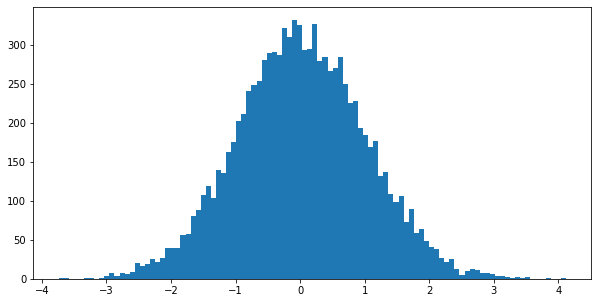

In [45]:
fig,ax = plt.subplots(figsize=(10,5))
ax.hist(np.random.normal(0,1,10000),bins=100)
plt.show()

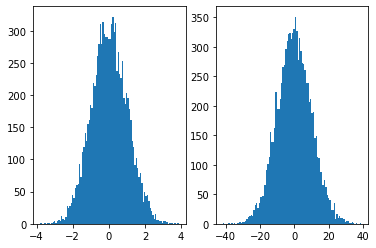

In [42]:
fig,ax = plt.subplots(1,2)
#ax = plt.gca()
ax[0].hist(np.random.normal(0,1,10000),bins=100)
ax[1].hist(np.random.normal(0,10,10000),bins=100)
plt.show()

## Центральная предельная теорема

In [133]:
# rate parameter for the exponentially distributed population
rate = 0.25

#Population mean
mu = 1/rate

# Population standard deviation
sd = np.sqrt(1/(rate**2))

print('Population mean:', mu)
print('Population standard deviation:', sd)

Population mean: 4.0
Population standard deviation: 4.0


In [134]:
sample_size = 2
df2 = pd.DataFrame(index= ['x1', 'x2'] )

for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df2[col] = exponential_sample

# Taking a peek at the samples
df2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,...,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,17.454786,1.411694,0.474705,4.815775,7.189984,0.419896,6.112806,5.032526,11.711334,3.885833,...,2.449177,1.305618,2.988602,0.373152,1.160852,1.637291,0.143865,1.631892,0.759214,8.276706
x2,2.077692,0.970776,1.316873,5.426263,0.817777,6.406242,2.083182,0.084919,0.339659,4.399864,...,1.678204,2.986934,1.565147,2.154093,2.574439,6.145790,3.616480,1.959128,5.327275,6.381467


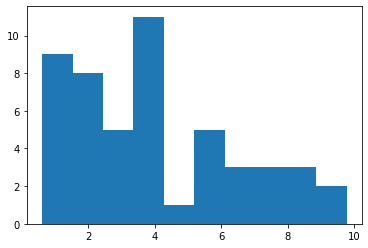

In [137]:
df2_sample_means = df2.mean()
plt.hist(df2_sample_means)
plt.show()

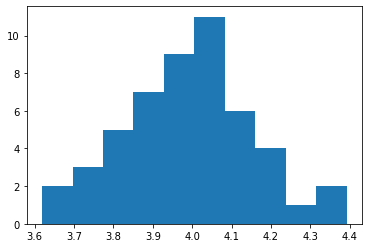

In [140]:
sample_size=500

df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample


df500_sample_means = pd.DataFrame(df500.mean(),columns=['Sample means'])
plt.hist(df500_sample_means['Sample means'])
plt.show()

In [139]:
df500_sample_means

,Sample means
sample 1,4.054453
sample 2,3.761132
sample 3,3.905274
sample 4,3.933050
sample 5,4.093267
sample 6,3.685376
sample 7,4.519135
sample 8,3.970240
sample 9,3.796047
sample 10,3.965066


## Доверительный интервал

In [106]:
confidence_interval = (st.t.interval(0.95,len(kickstarter.query('country=="JP"')['backers'])-1,kickstarter.query('country=="JP"')['backers'].mean(), 
                                    kickstarter.query('country=="JP"')['backers'].sem())
                      )

In [108]:
kickstarter.query('country=="JP"')['backers'].mean()

48.55

In [107]:
confidence_interval 

(25.853328195036845, 71.24667180496314)

In [114]:
confidence_interval = [kickstarter.query('country=="JP"')['backers'].quantile(0.025),kickstarter.query('country=="JP"')['backers'].quantile(0.975)]

In [115]:
confidence_interval

[0.0, 206.5749999999999]

# Анализ выбросов и аномалий. Боксплоты

<img src='https://agricolamz.github.io/2018_FE_R_statistics/Lab_9_files/figure-html/unnamed-chunk-1-1.png'>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png'>

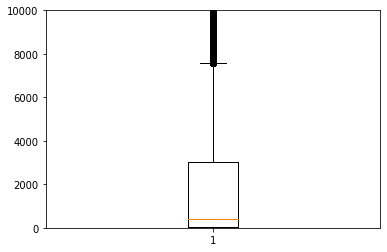

In [ ]:
plt.boxplot(kickstarter['usd pledged'])
plt.ylim((0,10000))
plt.show()

In [ ]:
def  burst(data, column): # функция расчета границ усов ящика с усами
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    return data[column].quantile(0.25)- iqr*1.5, data[column].quantile(0.75)+ iqr*1.5

(array([120174.,  17680.,  11109.,   7863.,   6634.,   4612.,   4299.,
          3521.,   2850.,   2129.]),
 array([   0. ,  756.2, 1512.4, 2268.6, 3024.8, 3781. , 4537.2, 5293.4,
        6049.6, 6805.8, 7562. ]),
 <a list of 10 Patch objects>)

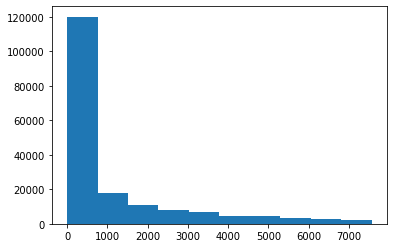

# Линейные графики

In [51]:
data = kickstarter.query('year!=1970').groupby('year')['name'].count().reset_index()

In [52]:
data 

,year,name
0,2009,1328
1,2010,10514
2,2011,26221
3,2012,41147
4,2013,44816
5,2014,66954
6,2015,74881
7,2016,56507
8,2017,52174
9,2018,124


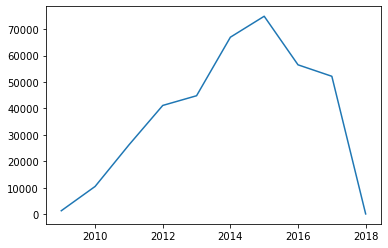

In [53]:
plt.plot(data['year'],data['name'])

# Барплоты

In [74]:
data = kickstarter.groupby('state').agg({'goal':'mean','usd pledged':'mean'}).reset_index()

In [71]:
data

,state,name,backers
0,canceled,38735,25.999948
1,failed,197511,16.428766
2,live,2798,68.124017
3,successful,133786,264.188368
4,suspended,1843,105.253391


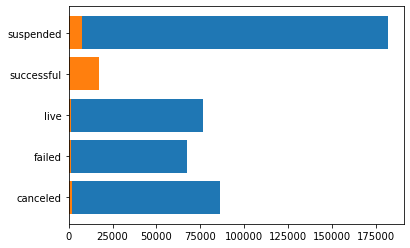

In [75]:
plt.barh(data['state'],data['goal'])
plt.barh(data['state'],data['usd pledged'])
plt.show()

# Пайчарт

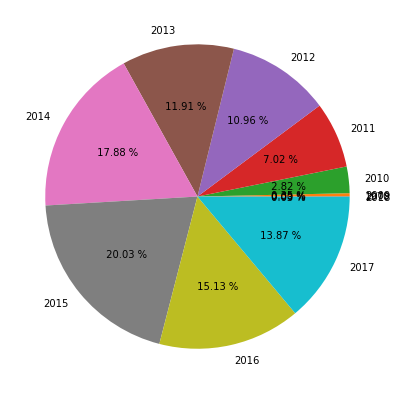

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(data['name'],labels=data['year'],autopct = '% 1.2f %% ')
plt.show()

# Скаттерплоты. Корреляция

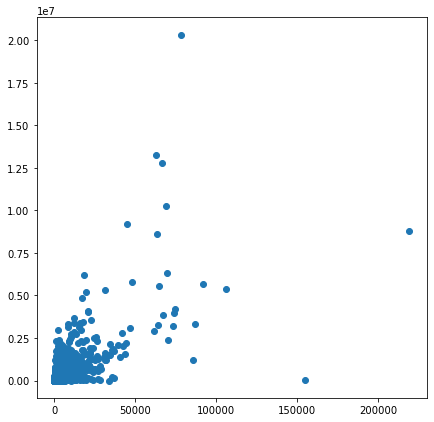

In [78]:
plt.figure(figsize=(7,7))
plt.scatter(kickstarter['backers'],kickstarter['usd pledged'])
plt.show()

<img src='https://gigabaza.ru/images/10/18849/589f89f0.gif'>

<img src='https://statanaliz.info/wp-content/uploads/2019/04/corr1.png'>

In [79]:
kickstarter.corr().style.background_gradient("RdBu_r")

,index,goal,pledged,backers,usd pledged,year,month,dayofweek,day,hour,duration
index,1,0.00260162,0.000581187,0.000110553,0.000703632,0.000663011,0.000364717,0.00152814,0.000314263,-0.00095795,-0.00183839
goal,0.00260162,1,0.00732719,0.00396856,0.0055332,0.0158656,0.00116358,-0.00201266,-0.00260344,0.00123555,0.00431077
pledged,0.000581187,0.00732719,1,0.717858,0.857372,0.0298071,0.00242799,-0.0257185,-8.61636e-06,0.00929347,0.000817043
backers,0.000110553,0.00396856,0.717858,1,0.697425,0.0167964,-0.00279825,-0.0282091,-0.00139595,0.0122486,-0.000822102
usd pledged,0.000703632,0.0055332,0.857372,0.697425,1,-0.00695863,-0.00664774,-0.0201693,-0.00177868,0.00726162,0.000769486
year,0.000663011,0.0158656,0.0298071,0.0167964,-0.00695863,1,-0.0720069,-0.0344962,-0.00359643,0.0481044,-0.127821
month,0.000364717,0.00116358,0.00242799,-0.00279825,-0.00664774,-0.0720069,1,-0.0166372,-0.0325984,0.00587928,-0.00906115
dayofweek,0.00152814,-0.00201266,-0.0257185,-0.0282091,-0.0201693,-0.0344962,-0.0166372,1,0.00162044,-0.126019,0.00529942
day,0.000314263,-0.00260344,-8.61636e-06,-0.00139595,-0.00177868,-0.00359643,-0.0325984,0.00162044,1,0.00363099,-0.007247
hour,-0.00095795,0.00123555,0.00929347,0.0122486,0.00726162,0.0481044,0.00587928,-0.126019,0.00363099,1,-0.010228


# Проверка гипотез. p-value

In [160]:
kickstarter['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

## Классика

<img src='https://be5.biz/ekonomika/e008/image/pic_186.jpg'>

In [80]:
stat,p_value = st.shapiro(kickstarter['backers'])


C:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [104]:
ks_statistic, p_value = st.kstest(kickstarter.query('country=="JP"')['backers'], 'norm')

In [105]:
p_value

2.884308735963735e-28

<img src='https://avatars.mds.yandex.net/get-zen_doc/4756594/pub_6053204155586b230c35ff53_60533a299b23db779bb57d6f/scale_2400'>

In [167]:
results = st.mannwhitneyu(kickstarter.query('state=="live"')['backers'],kickstarter.query('state=="failed"')['backers'])

In [168]:
results

MannwhitneyuResult(statistic=243001121.0, pvalue=1.256180608804107e-28)

In [193]:
results = st.ttest_ind(kickstarter.query('country=="US"')['backers'],kickstarter.query('country=="CH"')['backers'])

In [194]:
results

Ttest_indResult(statistic=0.6919255960085714, pvalue=0.48898460335125526)

## Бутстреп

In [191]:
A = kickstarter.query('country=="US"')['backers']
B = kickstarter.query('country=="CH"')['backers']

In [192]:
AB_difference = A.mean() - B.mean() 


alpha = 0.05
    
state = np.random.RandomState(12345)

bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
     
    united_samples = pd.concat([A, B]) 

    # создайте подвыборку
    #subsample = united_samples.sample(frac=1, replace=True,random_state=state)
    # разбейте подвыборку пополам
    subsample_A = A.sample(frac=0.1, replace=True,random_state=state)
    subsample_B = B.sample(frac=0.1, replace=True,random_state=state)

    # найдите разницу средних
    bootstrap_difference = subsample_B.mean() - subsample_A.mean()
    
    # если разница не меньше фактической, увеличиваем счётчик
    if bootstrap_difference >= AB_difference:
        count += 1

# p-value равно доле превышений значений
pvalue = 1. * count / bootstrap_samples
print('p-value =', pvalue)


p-value = 0.145
